##### <div style="text-align: right; font-family:Georgia;"> ***Sam VALLET et Thomas SINAPI*** </div>
## <center><span style="font-family:Georgia; font-size:3em;"> **Projet IAS** </span></center>


In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import csv
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


***
## **PRE PROCESSING :** ##
***

### **Premier dataset :** *"english_premier_league_data.csv" dont on conserve toutes les features statistiques* ###

In [98]:
df1 = pd.read_csv('Result_dataset/english_premier_league_data.csv', sep=';')
df1 = df1[df1['year'].isin([2016, 2017, 2018, 2019, 2020])] # on se restreint à ces années 
df1 = df1.rename(columns={'year': 'season'})
df1 = df1.drop(["Score","Half Time Score"], axis = 1)
df1.head()

Home Team       Away Team  Match Excitement  Home Team Rating  \
760      HULL CITY  LEICESTER CITY               5.9               6.7   
761        EVERTON       TOTTENHAM               4.9               7.0   
762  MIDDLESBROUGH           STOKE               4.5               6.4   
763        BURNLEY         SWANSEA               4.0               5.1   
764    SOUTHAMPTON         WATFORD               4.6               7.0   

     Away Team Rating  Home Team Possession %  Away Team Possession %  \
760               5.4                      50                      50   
761               6.4                      42                      58   
762               6.2                      46                      54   
763               7.9                      47                      53   
764               6.1                      64                      36   

     Home Team Off Target Shots  Home Team On Target Shots  \
760                         7.0                        5.0   
761                         4.0                        6.0   
762                         6.0                        2.0   
763                         5.0                        3.0   
764                        10.0                        6.0   

     Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
760                   14.0                      2.0                5.0   
761                   12.0                      2.0                5.0   
762                   12.0                      4.0                9.0   
763                   10.0                      2.0                7.0   
764                   24.0                      8.0                6.0   

     Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
760                 23.0                      76.0                   19.0   
761                 21.0                      73.0                   16.0   
762                 20.0                      75.0                   22.0   
763                 41.0                      71.0                   20.0   
764                 25.0                      85.0                    9.0   

     Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
760                  29.0              8.0                     2.0   
761                  40.0             10.0                     0.0   
762                  20.0             18.0                     3.0   
763                  16.0             10.0                     3.0   
764                  21.0              8.0                     1.0   

     Home Team Second Yellow Cards  Home Team Red Cards  \
760                            0.0                  0.0   
761                            0.0                  0.0   
762                            0.0                  0.0   
763                            0.0                  0.0   
764                            0.0                  0.0   

     Away Team Off Target Shots  Away Team On Target Shots  \
760                         9.0                        5.0   
761                         4.0                        4.0   
762                         9.0                        1.0   
763                         6.0                        9.0   
764                         4.0                        1.0   

     Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
760                   18.0                      4.0                3.0   
761                   13.0                      5.0                6.0   
762                   12.0                      2.0                6.0   
763                   17.0                      2.0                4.0   
764                    5.0                      0.0                2.0   

     Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
760                 16.0                      78.0                   18.0   
761                 42.0                      80.0                   10.0   
762                

***
### **Second dataset :** *"spi_matches.csv" dont on extrait certains features* ###

In [99]:
df2 = pd.read_csv('SPI_dataset/spi_matches.csv', sep=';')

df2.dropna()

ligues = ['Barclays Premier League']
df2 = df2[df2['league'].isin(ligues)] # que la Premier League

df2 = df2[df2['season'].isin([2016, 2017, 2018, 2019, 2020])] #on se retreint à ces années
df2 = df2.rename(columns={'team1': 'Home Team', 'team2': 'Away Team', # on renomme les features comme df
                          'score1': 'Home Team Goals Scored', 'score2': 'Away Team Goals Scored', 
                          'xg1': 'Home Team xG', 'xg2': 'Away Team xG',
                          'nsxg1': 'Home Team NSxG', 'nsxg2': 'Away Team NSxG',
                          'spi1': 'Home Team SPI Rate', 'spi2': 'Away Team SPI Rate',
                          'prob1': 'Home Team ProbWin', 'prob2': 'Away Team ProbWin',
                          'proj_score1': 'Home Team ProjScore', 'proj_score2': 'Away Team ProjScore',
                          'adj_score1': 'Home Team AdjScore', 'adj_score2': 'Away Team AdjScore',
                          'importance1': 'Home Team Importance', 'importance2': 'Away Team Importance',
                          })

df2 = df2.drop(['league_id', 'league'], axis = 1)


df2.head()



season        date       Home Team             Away Team  \
12    2016  2016-08-13            Hull             Leicester   
13    2016  2016-08-13  Crystal Palace  West Bromwich Albion   
14    2016  2016-08-13         Everton     Tottenham Hotspur   
15    2016  2016-08-13     Southampton               Watford   
16    2016  2016-08-13   Middlesbrough                 Stoke   

    SPI Rate Home Team  SPI Rate Away Team   prob1   prob2  probtie  \
12               53.57               66.81  0.3459  0.3621   0.2921   
13               55.19               58.66  0.4214  0.2939   0.2847   
14               68.02               73.25  0.3910  0.3401   0.2689   
15               69.49               59.33  0.5759  0.1874   0.2367   
16               56.32               60.35  0.4380  0.2692   0.2927   

    proj_score1  proj_score2  importance1  importance2  \
12         1.16         1.24         38.1         22.2   
13         1.35         1.14         43.6         34.6   
14         1.47         1.38         31.9         48.0   
15         1.91         1.05         34.1         30.7   
16         1.30         1.01         33.9         32.5   

    Home Team Goals Scored  Away Team Goals Scored  xG Home Team  \
12                     2.0                     1.0          0.85   
13                     0.0                     1.0          1.11   
14                     1.0                     1.0          0.73   
15                     1.0                     1.0          1.05   
16                     1.0                     1.0          1.40   

    xG Away Team  NSxG Home Team  NSxG Away Team  adj_score1  adj_score2  
12          2.77            0.17            1.25        2.10        1.05  
13          0.68            0.84            1.60        0.00        1.05  
14          1.11            0.88            1.81        1.05        1.05  
15          0.22            1.52            0.41        1.05        1.05  
16          0.55            1.13            1.06        1.05        1.05

In [100]:
data_set_1 = df1["Away Team"].unique() #liste des équipes de df1 sans doublons
data_set_2 = df2["Away Team"].unique() #liste des équipes de df2 sans doublons

In [101]:
fuzz.WRatio("TOTTENHAM","Tottenham Hotspur") # etudie la correspondance des string


90

In [102]:
# on veut identifier les noms d'equipes dans chaque dataframe pour que le merge se fasse correctement

def create_team_dict(data_set_1, data_set_2): #cree dictionnaire avec {nom dataset2 : nom dataset1}
    team_dict = {}
    for team2 in data_set_2:
        for team1 in data_set_1:
            ratio = fuzz.WRatio(team1, team2)
            if ratio >= 87: # ratio de 87 assure la correspondance pour CE dataset
                team_dict[team2] = team1
    return team_dict


In [103]:
team_names = create_team_dict(data_set_1,data_set_2)
df2['Home Team'] = df2['Home Team'].replace(team_names) #remplace nom dataset2 par nom dataset1 
df2['Away Team'] = df2['Away Team'].replace(team_names)
df2.head()

season        date       Home Team       Away Team  SPI Rate Home Team  \
12    2016  2016-08-13       HULL CITY  LEICESTER CITY               53.57   
13    2016  2016-08-13  CRYSTAL PALACE       WEST BROM               55.19   
14    2016  2016-08-13         EVERTON       TOTTENHAM               68.02   
15    2016  2016-08-13     SOUTHAMPTON         WATFORD               69.49   
16    2016  2016-08-13   MIDDLESBROUGH           STOKE               56.32   

    SPI Rate Away Team   prob1   prob2  probtie  proj_score1  proj_score2  \
12               66.81  0.3459  0.3621   0.2921         1.16         1.24   
13               58.66  0.4214  0.2939   0.2847         1.35         1.14   
14               73.25  0.3910  0.3401   0.2689         1.47         1.38   
15               59.33  0.5759  0.1874   0.2367         1.91         1.05   
16               60.35  0.4380  0.2692   0.2927         1.30         1.01   

    importance1  importance2  Home Team Goals Scored  Away Team Goals Scored  \
12         38.1         22.2                     2.0                     1.0   
13         43.6         34.6                     0.0                     1.0   
14         31.9         48.0                     1.0                     1.0   
15         34.1         30.7                     1.0                     1.0   
16         33.9         32.5                     1.0                     1.0   

    xG Home Team  xG Away Team  NSxG Home Team  NSxG Away Team  adj_score1  \
12          0.85          2.77            0.17            1.25        2.10   
13          1.11          0.68            0.84            1.60        0.00   
14          0.73          1.11            0.88            1.81        1.05   
15          1.05          0.22            1.52            0.41        1.05   
16          1.40          0.55            1.13            1.06        1.05   

    adj_score2  
12        1.05  
13        1.05  
14        1.05  
15        1.05  
16        1.05

***
### **FUSION DES DEUX DATAFRAMES** ###

In [104]:
# on merge par le score,les couples d'équipes et l'année 
# ON A DONC NOTRE DATAFRAME PROPRE

df = pd.merge(df1, df2, on=['season', 'Home Team', 'Away Team','Home Team Goals Scored', 'Away Team Goals Scored']) 
df.head()


Home Team       Away Team  Match Excitement  Home Team Rating  \
0      HULL CITY  LEICESTER CITY               5.9               6.7   
1        EVERTON       TOTTENHAM               4.9               7.0   
2  MIDDLESBROUGH           STOKE               4.5               6.4   
3        BURNLEY         SWANSEA               4.0               5.1   
4    SOUTHAMPTON         WATFORD               4.6               7.0   

   Away Team Rating  Home Team Possession %  Away Team Possession %  \
0               5.4                      50                      50   
1               6.4                      42                      58   
2               6.2                      46                      54   
3               7.9                      47                      53   
4               6.1                      64                      36   

   Home Team Off Target Shots  Home Team On Target Shots  \
0                         7.0                        5.0   
1                         4.0                        6.0   
2                         6.0                        2.0   
3                         5.0                        3.0   
4                        10.0                        6.0   

   Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
0                   14.0                      2.0                5.0   
1                   12.0                      2.0                5.0   
2                   12.0                      4.0                9.0   
3                   10.0                      2.0                7.0   
4                   24.0                      8.0                6.0   

   Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
0                 23.0                      76.0                   19.0   
1                 21.0                      73.0                   16.0   
2                 20.0                      75.0                   22.0   
3                 41.0                      71.0                   20.0   
4                 25.0                      85.0                    9.0   

   Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
0                  29.0              8.0                     2.0   
1                  40.0             10.0                     0.0   
2                  20.0             18.0                     3.0   
3                  16.0             10.0                     3.0   
4                  21.0              8.0                     1.0   

   Home Team Second Yellow Cards  Home Team Red Cards  \
0                            0.0                  0.0   
1                            0.0                  0.0   
2                            0.0                  0.0   
3                            0.0                  0.0   
4                            0.0                  0.0   

   Away Team Off Target Shots  Away Team On Target Shots  \
0                         9.0                        5.0   
1                         4.0                        4.0   
2                         9.0                        1.0   
3                         6.0                        9.0   
4                         4.0                        1.0   

   Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
0                   18.0                      4.0                3.0   
1                   13.0                      5.0                6.0   
2                   12.0                      2.0                6.0   
3                   17.0                      2.0                4.0   
4                    5.0                      0.0                2.0   

   Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
0                 16.0                      78.0                   18.0   
1                 42.0                      80.0                   10.0   
2                 23.0                      79.0                   27.0   
3                 13.0                      78.0        

In [105]:
df.shape

(1900, 54)

***AJOUT DE DEUX COLONNES***

In [106]:
df = df.dropna() 
df["Score Difference"] = df["Home Team Goals Scored"] - df["Away Team Goals Scored"]  # on renseigne l'ecart de score
df["Match Outcome"] = df["Score Difference"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)) # on renseigne l'issue du match (1/0/-1)
#df = pd.get_dummies(df, columns=["Home Team", "Away Team"]).head() # Convertir les attributs catégoriels en attributs numériques


In [107]:
df.head()

Home Team       Away Team  Match Excitement  Home Team Rating  \
0      HULL CITY  LEICESTER CITY               5.9               6.7   
1        EVERTON       TOTTENHAM               4.9               7.0   
2  MIDDLESBROUGH           STOKE               4.5               6.4   
3        BURNLEY         SWANSEA               4.0               5.1   
4    SOUTHAMPTON         WATFORD               4.6               7.0   

   Away Team Rating  Home Team Possession %  Away Team Possession %  \
0               5.4                      50                      50   
1               6.4                      42                      58   
2               6.2                      46                      54   
3               7.9                      47                      53   
4               6.1                      64                      36   

   Home Team Off Target Shots  Home Team On Target Shots  \
0                         7.0                        5.0   
1                         4.0                        6.0   
2                         6.0                        2.0   
3                         5.0                        3.0   
4                        10.0                        6.0   

   Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
0                   14.0                      2.0                5.0   
1                   12.0                      2.0                5.0   
2                   12.0                      4.0                9.0   
3                   10.0                      2.0                7.0   
4                   24.0                      8.0                6.0   

   Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
0                 23.0                      76.0                   19.0   
1                 21.0                      73.0                   16.0   
2                 20.0                      75.0                   22.0   
3                 41.0                      71.0                   20.0   
4                 25.0                      85.0                    9.0   

   Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
0                  29.0              8.0                     2.0   
1                  40.0             10.0                     0.0   
2                  20.0             18.0                     3.0   
3                  16.0             10.0                     3.0   
4                  21.0              8.0                     1.0   

   Home Team Second Yellow Cards  Home Team Red Cards  \
0                            0.0                  0.0   
1                            0.0                  0.0   
2                            0.0                  0.0   
3                            0.0                  0.0   
4                            0.0                  0.0   

   Away Team Off Target Shots  Away Team On Target Shots  \
0                         9.0                        5.0   
1                         4.0                        4.0   
2                         9.0                        1.0   
3                         6.0                        9.0   
4                         4.0                        1.0   

   Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
0                   18.0                      4.0                3.0   
1                   13.0                      5.0                6.0   
2                   12.0                      2.0                6.0   
3                   17.0                      2.0                4.0   
4                    5.0                      0.0                2.0   

   Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
0                 16.0                      78.0                   18.0   
1                 42.0                      80.0                   10.0   
2                 23.0                      79.0                   27.0   
3                 13.0                      78.0        

***
## **DATA VISUALIZATION :** ## 
***


In [108]:
# df.mean()
df.describe()

Match Excitement  Home Team Rating  Away Team Rating  \
count       1860.000000       1860.000000       1860.000000   
mean           5.356022          6.417634          6.219462   
std            1.671004          0.999731          0.994848   
min            1.700000          2.400000          1.500000   
25%            4.100000          5.700000          5.500000   
50%            5.300000          6.400000          6.200000   
75%            6.400000          7.000000          6.800000   
max           10.000000         10.000000         10.000000   

       Home Team Possession %  Away Team Possession %  \
count             1860.000000             1860.000000   
mean                51.205376               48.794624   
std                 13.080903               13.080903   
min                 18.000000               17.000000   
25%                 42.000000               39.000000   
50%                 51.000000               49.000000   
75%                 61.000000               58.000000   
max                 83.000000               82.000000   

       Home Team Off Target Shots  Home Team On Target Shots  \
count                 1860.000000                1860.000000   
mean                     5.220430                   4.664516   
std                      2.697161                   2.655660   
min                      0.000000                   0.000000   
25%                      3.000000                   3.000000   
50%                      5.000000                   4.000000   
75%                      7.000000                   6.000000   
max                     16.000000                  17.000000   

       Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
count            1860.000000              1860.000000        1860.000000   
mean               13.582796                 3.710215           5.693548   
std                 5.680968                 2.542041           3.065830   
min                 0.000000                 0.000000           0.000000   
25%                10.000000                 2.000000           3.000000   
50%                13.000000                 3.000000           5.000000   
75%                17.000000                 5.000000           8.000000   
max                38.000000                19.000000          19.000000   

       Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
count          1860.000000               1860.000000            1860.000000   
mean             21.896237                 78.311290              18.459677   
std               6.210620                  7.743771               7.461429   
min               5.000000                 51.000000               3.000000   
25%              18.000000                 73.000000              13.000000   
50%              21.000000                 79.000000              18.000000   
75%              26.000000                 84.000000              23.000000   
max              44.000000                 94.000000              67.000000   

       Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
count           1860.000000      1860.000000             1860.000000   
mean              20.514516        10.625269                1.579570   
std                9.654399         3.431792                1.235399   
min                0.000000         0.000000                0.000000   
25%               14.000000         8.000000                1.000000   
50%               19.000000        10.000000                1.000000   
75%               26.000000        13.000000                2.000000   
max               68.000000        24.000000                6.000000   

       Home Team Second Yellow Cards  Home Team Red Cards  \
count                    1860.000000          1860.000000   
mean                        0.018280             0.031183   
std                         0.133997             0.179940   
min                         0.000000             0.000000 

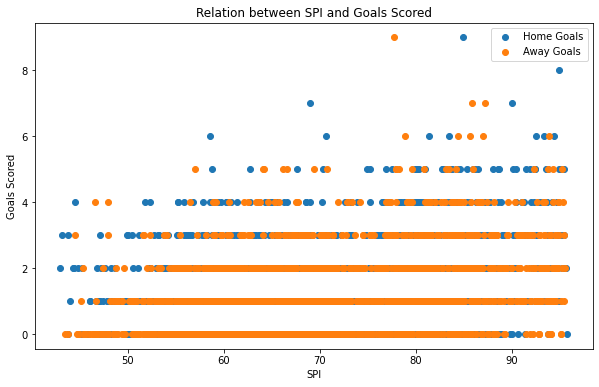

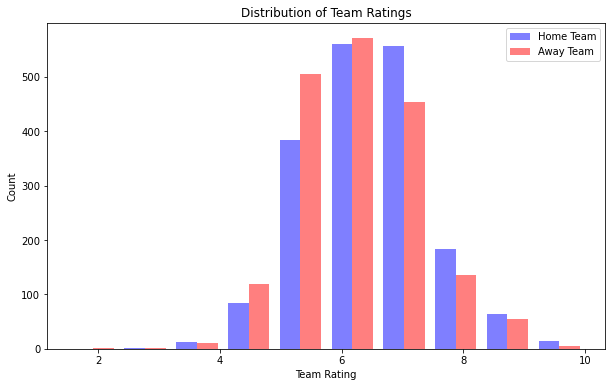

In [109]:
# Tracer le diagramme en nuage de points
plt.subplots(figsize=(10, 6))
plt.scatter(df['SPI Rate Home Team'], df['Home Team Goals Scored'], label='Home Goals')
plt.scatter(df['SPI Rate Away Team'], df['Away Team Goals Scored'], label='Away Goals')

# Ajouter des titres et des légendes
plt.title('Relation between SPI and Goals Scored')
plt.xlabel('SPI')
plt.ylabel('Goals Scored')
plt.legend()

# Afficher le graphique
plt.show()


#####
plt.subplots(figsize=(10, 6))
plt.hist([df['Home Team Rating'], df['Away Team Rating']], color=['blue', 'red'], alpha=0.5, bins=10)
plt.xlabel('Team Rating')
plt.ylabel('Count')
plt.title('Distribution of Team Ratings')
plt.legend(['Home Team', 'Away Team'])
plt.show()



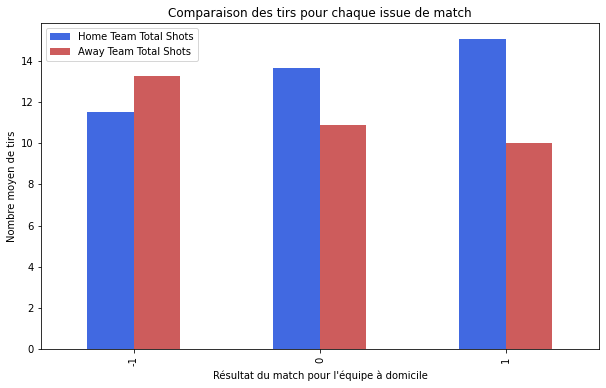

In [110]:
import matplotlib.pyplot as plt
# Créer un graphique en barres pour comparer les tirs de chaque équipe pour chaque issue de match

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('Match Outcome').agg({'Home Team Total Shots': 'mean', 'Away Team Total Shots': 'mean'}).plot(kind='bar', ax=ax, color=['royalblue', 'indianred'])
ax.set_xlabel('Résultat du match pour l\'équipe à domicile')
ax.set_ylabel('Nombre moyen de tirs')
ax.set_title('Comparaison des tirs pour chaque issue de match')
plt.show()


In [111]:
df.head()

Home Team       Away Team  Match Excitement  Home Team Rating  \
0      HULL CITY  LEICESTER CITY               5.9               6.7   
1        EVERTON       TOTTENHAM               4.9               7.0   
2  MIDDLESBROUGH           STOKE               4.5               6.4   
3        BURNLEY         SWANSEA               4.0               5.1   
4    SOUTHAMPTON         WATFORD               4.6               7.0   

   Away Team Rating  Home Team Possession %  Away Team Possession %  \
0               5.4                      50                      50   
1               6.4                      42                      58   
2               6.2                      46                      54   
3               7.9                      47                      53   
4               6.1                      64                      36   

   Home Team Off Target Shots  Home Team On Target Shots  \
0                         7.0                        5.0   
1                         4.0                        6.0   
2                         6.0                        2.0   
3                         5.0                        3.0   
4                        10.0                        6.0   

   Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
0                   14.0                      2.0                5.0   
1                   12.0                      2.0                5.0   
2                   12.0                      4.0                9.0   
3                   10.0                      2.0                7.0   
4                   24.0                      8.0                6.0   

   Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
0                 23.0                      76.0                   19.0   
1                 21.0                      73.0                   16.0   
2                 20.0                      75.0                   22.0   
3                 41.0                      71.0                   20.0   
4                 25.0                      85.0                    9.0   

   Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
0                  29.0              8.0                     2.0   
1                  40.0             10.0                     0.0   
2                  20.0             18.0                     3.0   
3                  16.0             10.0                     3.0   
4                  21.0              8.0                     1.0   

   Home Team Second Yellow Cards  Home Team Red Cards  \
0                            0.0                  0.0   
1                            0.0                  0.0   
2                            0.0                  0.0   
3                            0.0                  0.0   
4                            0.0                  0.0   

   Away Team Off Target Shots  Away Team On Target Shots  \
0                         9.0                        5.0   
1                         4.0                        4.0   
2                         9.0                        1.0   
3                         6.0                        9.0   
4                         4.0                        1.0   

   Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
0                   18.0                      4.0                3.0   
1                   13.0                      5.0                6.0   
2                   12.0                      2.0                6.0   
3                   17.0                      2.0                4.0   
4                    5.0                      0.0                2.0   

   Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
0                 16.0                      78.0                   18.0   
1                 42.0                      80.0                   10.0   
2                 23.0                      79.0                   27.0   
3                 13.0                      78.0        

***
### **ENCODAGE :** ###
***

In [112]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# encodeur sur les noms des équipes
encoder.fit(df[["Home Team", "Away Team"]])

# transformation des noms des équipes en nombres
df[["Home Team", "Away Team"]] = encoder.transform(df[["Home Team", "Away Team"]])
df[["Home Team", "Away Team"]].head()

Home Team  Away Team
0       11.0       13.0
1        8.0       25.0
2       17.0       22.0
3        4.0       24.0
4       21.0       26.0

---
---

In [93]:
df =df.drop("Home Team Goals Scored", axis = 1)
df = df.drop("Away Team Goals Scored", axis = 1)
df = df.drop("Home Team Goals Conceeded", axis = 1)
df = df.drop("Away Team Goals Conceeded", axis = 1)
df.head()

Home Team  Away Team  Match Excitement  Home Team Rating  Away Team Rating  \
0       11.0       13.0               5.9               6.7               5.4   
1        8.0       25.0               4.9               7.0               6.4   
2       17.0       22.0               4.5               6.4               6.2   
3        4.0       24.0               4.0               5.1               7.9   
4       21.0       26.0               4.6               7.0               6.1   

   Home Team Possession %  Away Team Possession %  Home Team Off Target Shots  \
0                      50                      50                         7.0   
1                      42                      58                         4.0   
2                      46                      54                         6.0   
3                      47                      53                         5.0   
4                      64                      36                        10.0   

   Home Team On Target Shots  Home Team Total Shots  Home Team Blocked Shots  \
0                        5.0                   14.0                      2.0   
1                        6.0                   12.0                      2.0   
2                        2.0                   12.0                      4.0   
3                        3.0                   10.0                      2.0   
4                        6.0                   24.0                      8.0   

   Home Team Corners  Home Team Throw Ins  Home Team Pass Success %  \
0                5.0                 23.0                      76.0   
1                5.0                 21.0                      73.0   
2                9.0                 20.0                      75.0   
3                7.0                 41.0                      71.0   
4                6.0                 25.0                      85.0   

   Home Team Aerials Won  Home Team Clearances  Home Team Fouls  \
0                   19.0                  29.0              8.0   
1                   16.0                  40.0             10.0   
2                   22.0                  20.0             18.0   
3                   20.0                  16.0             10.0   
4                    9.0                  21.0              8.0   

   Home Team Yellow Cards  Home Team Second Yellow Cards  Home Team Red Cards  \
0                     2.0                            0.0                  0.0   
1                     0.0                            0.0                  0.0   
2                     3.0                            0.0                  0.0   
3                     3.0                            0.0                  0.0   
4                     1.0                            0.0                  0.0   

   Away Team Off Target Shots  Away Team On Target Shots  \
0                         9.0                        5.0   
1                         4.0                        4.0   
2                         9.0                        1.0   
3                         6.0                        9.0   
4                         4.0                        1.0   

   Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
0                   18.0                      4.0                3.0   
1                   13.0                      5.0                6.0   
2                   12.0                      2.0                6.0   
3                   17.0                      2.0                4.0   
4                    5.0                      0.0                2.0   

   Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
0                 16.0                      78.0                   18.0   
1                 42.0                      80.0                   10.0   
2                 23.0                      79.0                   27.0   
3                 13.0                      78.0                   32.0   
4                 12.0                      69.0              

In [94]:
features = ['Id', 'year', 'Home Team', 'Away Team', 'Match Excitement',
       'Home Team Rating', 'Away Team Rating', 'Home Team Possession %',
       'Away Team Possession %', 'Home Team Off Target Shots',
       'Home Team On Target Shots', 'Home Team Total Shots',
       'Home Team Blocked Shots', 'Home Team Corners', 'Home Team Throw Ins',
       'Home Team Pass Success %', 'Home Team Aerials Won',
       'Home Team Clearances', 'Home Team Fouls', 'Home Team Yellow Cards',
       'Home Team Second Yellow Cards', 'Home Team Red Cards',
       'Away Team Off Target Shots', 'Away Team On Target Shots',
       'Away Team Total Shots', 'Away Team Blocked Shots', 'Away Team Corners',
       'Away Team Throw Ins', 'Away Team Pass Success %',
       'Away Team Aerials Won', 'Away Team Clearances', 'Away Team Fouls',
       'Away Team Yellow Cards', 'Away Team Second Yellow Cards',
       'Away Team Red Cards', 'xG Home Team', 'xG Away Team',
       'NonShot xG Home Team', 'NonShot xG Away Team', 'SPI Rate Home Team',
       'SPI Rate Away Team']

In [96]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.2, random_state=42)

# Entraînement d'un modèle de forêt aléatoire
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))



KeyError: "['year', 'Id', 'NonShot xG Away Team', 'NonShot xG Home Team'] not in index"

In [35]:
X_test.head()

Id  year  Home Team  Away Team  Match Excitement  Home Team Rating  \
1222  1200  2017       10.0       25.0               5.9               4.9   
111   1195  2017        4.0       10.0               1.9               6.1   
554   2075  2019        1.0       21.0               6.5               5.1   
526   2507  2020       14.0       15.0               6.0               5.0   
1311   988  2016       22.0        8.0               5.0               6.3   

      Away Team Rating  Home Team Possession %  Away Team Possession %  \
1222               8.4                      40                      60   
111                6.7                      52                      48   
554                7.1                      56                      44   
526                7.8                      56                      44   
1311               6.0                      47                      53   

      Home Team Off Target Shots  Home Team On Target Shots  \
1222                         2.0                        1.0   
111                          1.0                        2.0   
554                          7.0                        6.0   
526                          2.0                        3.0   
1311                         5.0                        7.0   

      Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
1222                    6.0                      3.0                4.0   
111                     4.0                      1.0                3.0   
554                    19.0                      6.0                7.0   
526                     8.0                      3.0                6.0   
1311                   14.0                      2.0                5.0   

      Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
1222                 31.0                      73.0                   11.0   
111                  31.0                      73.0                   26.0   
554                  22.0                      78.0                   31.0   
526                  25.0                      88.0                   10.0   
1311                 19.0                      78.0                   23.0   

      Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
1222                  25.0              7.0                     1.0   
111                   22.0              9.0                     3.0   
554                   22.0             16.0                     2.0   
526                    9.0             13.0                     2.0   
1311                  23.0             21.0                     1.0   

      Home Team Second Yellow Cards  Home Team Red Cards  \
1222                            0.0                  0.0   
111                             0.0                  0.0   
554                             0.0                  0.0   
526                             0.0                  0.0   
1311                            0.0                  0.0   

      Away Team Off Target Shots  Away Team On Target Shots  \
1222                         5.0                        7.0   
111                          5.0                        2.0   
554                          5.0                        8.0   
526                          3.0                        5.0   
1311                         7.0                        5.0   

      Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
1222                   14.0                      2.0                7.0   
111                     9.0                      2.0                4.0   
554                    17.0                      4.0                5.0   
526                     8.0                      0.0                1.0   
1311                   15.0                      3.0                5.0   

      Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
1222                 30.0                      81.0                   14.0   
111                  

In [36]:
correct_predictions = []
incorrect_predictions = []

for i in range(len(y_pred)):
    if y_pred[i] == y_test.values[i]:
        correct_predictions.append(X_test.index[i])
    else:
        incorrect_predictions.append(X_test.index[i])

print("Nombre de prédictions correctes :", len(correct_predictions))
print("Nombre de prédictions incorrectes :", len(incorrect_predictions))

# Affichage des prédictions correctes
# print("Prédictions correctes :")
# for i in correct_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

# # Affichage des prédictions incorrectes
# print("Prédictions incorrectes :")
# for i in incorrect_predictions:
#     print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])


Nombre de prédictions correctes : 342
Nombre de prédictions incorrectes : 38


In [37]:
X_test.head()

Id  year  Home Team  Away Team  Match Excitement  Home Team Rating  \
1222  1200  2017       10.0       25.0               5.9               4.9   
111   1195  2017        4.0       10.0               1.9               6.1   
554   2075  2019        1.0       21.0               6.5               5.1   
526   2507  2020       14.0       15.0               6.0               5.0   
1311   988  2016       22.0        8.0               5.0               6.3   

      Away Team Rating  Home Team Possession %  Away Team Possession %  \
1222               8.4                      40                      60   
111                6.7                      52                      48   
554                7.1                      56                      44   
526                7.8                      56                      44   
1311               6.0                      47                      53   

      Home Team Off Target Shots  Home Team On Target Shots  \
1222                         2.0                        1.0   
111                          1.0                        2.0   
554                          7.0                        6.0   
526                          2.0                        3.0   
1311                         5.0                        7.0   

      Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
1222                    6.0                      3.0                4.0   
111                     4.0                      1.0                3.0   
554                    19.0                      6.0                7.0   
526                     8.0                      3.0                6.0   
1311                   14.0                      2.0                5.0   

      Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
1222                 31.0                      73.0                   11.0   
111                  31.0                      73.0                   26.0   
554                  22.0                      78.0                   31.0   
526                  25.0                      88.0                   10.0   
1311                 19.0                      78.0                   23.0   

      Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
1222                  25.0              7.0                     1.0   
111                   22.0              9.0                     3.0   
554                   22.0             16.0                     2.0   
526                    9.0             13.0                     2.0   
1311                  23.0             21.0                     1.0   

      Home Team Second Yellow Cards  Home Team Red Cards  \
1222                            0.0                  0.0   
111                             0.0                  0.0   
554                             0.0                  0.0   
526                             0.0                  0.0   
1311                            0.0                  0.0   

      Away Team Off Target Shots  Away Team On Target Shots  \
1222                         5.0                        7.0   
111                          5.0                        2.0   
554                          5.0                        8.0   
526                          3.0                        5.0   
1311                         7.0                        5.0   

      Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
1222                   14.0                      2.0                7.0   
111                     9.0                      2.0                4.0   
554                    17.0                      4.0                5.0   
526                     8.0                      0.0                1.0   
1311                   15.0                      3.0                5.0   

      Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
1222                 30.0                      81.0                   14.0   
111                  

In [38]:
# Créer un DataFrame avec les colonnes "Home Team" et "Away Team" de X_test
teams_encoded = X_test[["Home Team", "Away Team"]]

# Utiliser l'encodeur pour inverser la transformation sur les colonnes "Home Team" et "Away Team"
teams_decoded = encoder.inverse_transform(teams_encoded)

# Remplacer les colonnes "Home Team" et "Away Team" de X_test avec les noms d'équipe décodés
X_test[["Home Team", "Away Team"]] = teams_decoded

# Afficher X_test pour vérifier que les noms d'équipe ont été décodés avec succès
print(X_test[["Home Team", "Away Team"]].head())


         Home Team     Away Team
1222  HUDDERSFIELD     TOTTENHAM
111        BURNLEY  HUDDERSFIELD
554    ASTON VILLA   SOUTHAMPTON
526      LIVERPOOL      MAN CITY
1311         STOKE       EVERTON


In [39]:
""" print("Prédictions correctes :")
for i in correct_predictions:
    print("Match", i, "prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i]) """

# Affichage des prédictions incorrectes
print("Prédictions incorrectes :")
for i in incorrect_predictions:
    print("Match :", X_test["Home Team"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])
    print("Match :", X_test["Home Team"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"prédiction :", y_pred2[X_test.index.get_loc(i)], "résultat réel :", y_test[i])

Prédictions incorrectes :
Match : STOKE - EVERTON prédiction : 1 résultat réel : 0
Match : STOKE - EVERTON prédiction : [0.14 0.36 0.5 ] résultat réel : 0
Match : EVERTON - SOUTHAMPTON prédiction : 1 résultat réel : 0
Match : EVERTON - SOUTHAMPTON prédiction : [0.15 0.4  0.45] résultat réel : 0
Match : CHELSEA - ARSENAL prédiction : 1 résultat réel : 0
Match : CHELSEA - ARSENAL prédiction : [0.01 0.14 0.85] résultat réel : 0
Match : LEICESTER CITY - NORWICH prédiction : 1 résultat réel : 0
Match : LEICESTER CITY - NORWICH prédiction : [0.   0.17 0.83] résultat réel : 0
Match : STOKE - LEICESTER CITY prédiction : 1 résultat réel : 0
Match : STOKE - LEICESTER CITY prédiction : [0.   0.21 0.79] résultat réel : 0
Match : BURNLEY - LEICESTER CITY prédiction : 1 résultat réel : 0
Match : BURNLEY - LEICESTER CITY prédiction : [0.07 0.45 0.48] résultat réel : 0
Match : NEWCASTLE - BURNLEY prédiction : 1 résultat réel : 0
Match : NEWCASTLE - BURNLEY prédiction : [0.03 0.43 0.54] résultat réel :

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.predict_proba(X_train.head())


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [41]:


X_train = df[features]
y_train = df["Match Outcome"]
X_train.head()


Id  year  Home Team  Away Team  Match Excitement  Home Team Rating  \
0  1042  2016       22.0        6.0               6.7               5.1   
1  1209  2017       18.0       14.0               4.8               6.6   
2  1744  2018       21.0        8.0               5.7               7.2   
3  1780  2018        8.0       15.0               4.6               5.7   
4  1928  2019       29.0        4.0               5.1               6.0   

   Away Team Rating  Home Team Possession %  Away Team Possession %  \
0               7.3                      36                      64   
1               6.3                      32                      68   
2               5.8                      39                      61   
3               7.5                      39                      61   
4               6.1                      65                      35   

   Home Team Off Target Shots  Home Team On Target Shots  \
0                         2.0                        1.0   
1                         1.0                        5.0   
2                         4.0                        4.0   
3                         0.0                        1.0   
4                         8.0                        2.0   

   Home Team Total Shots  Home Team Blocked Shots  Home Team Corners  \
0                    5.0                      2.0                5.0   
1                    8.0                      2.0                1.0   
2                   11.0                      3.0                7.0   
3                    4.0                      3.0                5.0   
4                   17.0                      7.0                4.0   

   Home Team Throw Ins  Home Team Pass Success %  Home Team Aerials Won  \
0                 22.0                      67.0                   13.0   
1                 21.0                      66.0                   17.0   
2                 22.0                      68.0                   40.0   
3                 26.0                      75.0                   17.0   
4                 21.0                      79.0                   39.0   

   Home Team Clearances  Home Team Fouls  Home Team Yellow Cards  \
0                  17.0             16.0                     5.0   
1                  35.0             11.0                     1.0   
2                  41.0             12.0                     2.0   
3                  23.0             12.0                     1.0   
4                  23.0              9.0                     0.0   

   Home Team Second Yellow Cards  Home Team Red Cards  \
0                            1.0                  0.0   
1                            0.0                  0.0   
2                            0.0                  0.0   
3                            0.0                  0.0   
4                            0.0                  0.0   

   Away Team Off Target Shots  Away Team On Target Shots  \
0                         5.0                        7.0   
1                         9.0                        2.0   
2                         1.0                        2.0   
3                         4.0                        4.0   
4                         6.0                        4.0   

   Away Team Total Shots  Away Team Blocked Shots  Away Team Corners  \
0                   20.0                      8.0               11.0   
1                   17.0                      6.0                5.0   
2                    7.0                      4.0                6.0   
3                   15.0                      7.0                6.0   
4                   13.0                      3.0                3.0   

   Away Team Throw Ins  Away Team Pass Success %  Away Team Aerials Won  \
0                 23.0                      84.0                   16.0   
1                 24.0                      84.0                   20.0   
2                 36.0                      74.0                   31.0   
3                 23.0              

In [21]:
from gensim.models import Word2Vec

# Charger les données
data = pd.read_csv('IAS_dataset.csv', sep=';')

# Obtenir les noms d'équipes uniques
unique_teams = list(set(data['Home Team']).union(set(data['Away Team'])))

# Créer les représentations vectorielles
team_embeddings = Word2Vec([unique_teams], vector_size=100, min_count=1, window=5, sg=1)


# Obtenir la représentation vectorielle d'une équipe

# for team in unique_teams:
#     print(team, team_embeddings.wv.get_vector(team))

team_embeddings.wv.get_vector('ARSENAL')
len(team_embeddings.wv.get_vector('ARSENAL'))



100

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Créer les données d'entraînement et de test
X = []
y = []
for i in range(len(data)):
    home_team = data.loc[i, 'Home Team']
    away_team = data.loc[i, 'Away Team']
    home_team_embedding = team_embeddings.wv[home_team]
    away_team_embedding = team_embeddings.wv[away_team]
    X.append(np.concatenate((home_team_embedding, away_team_embedding)))
    y.append(int(data.loc[i, 'Home Team Goals Scored'] > data.loc[i, 'Away Team Goals Scored']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Évaluer le modèle
accuracy = lr.score(X_test, y_test)
print('Accuracy:', accuracy)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 380

In [23]:
print('Dimensions de y_test:', len(y_test))
print('Dimensions de la sortie de predict:', len(lr.predict(X_test)))

Dimensions de y_test: 380


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 380

In [29]:
y_test_int = np.asarray(y_test).astype('int')

print('Dimensions de y_test_int:', len(y_test_int))
print('Dimensions de la sortie de predict:', len(lr.predict(X_test)))


Dimensions de y_test_int: 380


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 380

In [31]:
np.float(3)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations